# Proving Neyman Orthogonality 
We start with the standard linear model formulation:

$$
Y = \alpha D + \beta' W + \epsilon
$$

Where:
- $\alpha$ is the coefficient of interest linked to the treatment variable $D$.
- $\beta$ is a vector of coefficients associated with the control variables $W$.
- $\epsilon$ is the error term.

The residuals from Lasso regressions:
- For the outcome $Y$ on controls $W$, let the estimate be $\gamma_{YW}'$.
- For the treatment $D$ on controls $W$, let the estimate be $\gamma_{DW}'$.

The residuals are defined as:
$$
\tilde{Y} = Y - \gamma_{YW}'W
$$
$$
\tilde{D} = D - \gamma_{DW}'W
$$

We define the true parameter vector:
$$
\eta^0 = (\gamma_{DW}', \gamma_{YW}')'
$$

Since $\alpha$ is a function of $\eta$, where $\eta = (\eta_1', \eta_2')'$, we aim to show that $\alpha$ is insensitive to local perturbations around $\eta^0$:
$$
D = \frac{\partial \alpha(\eta^0)}{\partial \eta} = 0
$$

### Proposed Model

We assume the model:
$$
\tilde{Y} = a \tilde{D} + \mu
$$
Where $\alpha = \arg\min_{a \in \mathbb{R}} E[(\tilde{Y} - a \tilde{D})^2]$. $\alpha$ is the true value as it minimizes the expected square residuals.

The moment condition for the model is:
$$
M(a, \eta) = E[(\tilde{Y}(\eta_1) - a \tilde{D}(\eta_2)) \tilde{D}(\eta_2)]
$$
Where:
$$
\tilde{Y}(\eta_1) = Y - \eta_1'W
$$
$$
\tilde{D}(\eta_2) = D - \eta_2'W
$$

At true values $\eta = \eta^0$:
$$
\tilde{Y} = Y - \gamma_{YW}'W
$$
$$
\tilde{D} = D - \gamma_{DW}'W
$$

### Application of the Implicit Function Theorem

To derive $a$ with respect to $\eta$:
$$
\frac{\partial a}{\partial \eta} = -\partial_a M(\alpha, \eta^0)^{-1} \partial_\eta M(\alpha, \eta^0)
$$
To demonstrate $\frac{\partial \alpha(\eta^0)}{\partial \eta} = 0$, we need $\partial_\eta M(\alpha, \eta^0)$ to be zero since $\partial_a M(\alpha, \eta^0)$ cannot be zero.

### Derivatives Calculation

For the first component:
$$
\frac{\partial M(\alpha, \eta^0)}{\partial \eta_1} = E\left[\frac{\partial \tilde{Y}(\eta_1)}{\partial \eta_1} \tilde{D}\right]
$$
Given that $\tilde{Y} = Y - \eta_1'W$:
$$
\frac{\partial \tilde{Y}}{\partial \eta_1} = -W
$$
Thus:
$$
\frac{\partial M(\alpha, \eta^0)}{\partial \eta_1} = E[-W \tilde{D}] = 0
$$

For the second component:
$$
\frac{\partial M(\alpha, \eta^0)}{\partial \eta_2} = E\left[(-a \frac{\partial \tilde{D}(\eta_2)}{\partial \eta_2})\tilde{D} + \frac{\partial \tilde{D}(\eta_2)}{\partial \eta_2}(\tilde{Y} - a\tilde{D})\right]
$$
Since $\tilde{D} = D - \eta_2'W$:
$$
\frac{\partial \tilde{D}}{\partial \eta_2} = -W
$$
Resulting in:
$$
\frac{\partial M(\alpha, \eta^0)}{\partial \eta_2} = -E[W\tilde{Y}] + 2E(\alpha W\tilde{D}) = 0
$$

This confirms that $\frac{\partial M}{\partial \eta_1} = 0$ and $\frac{\partial M}{\partial \eta_2} = 0$. Therefore, $\frac{\partial \alpha(\eta^0)}{\partial \eta} = 0$ is proven.


In [ ]:
# Install and load necessary packages
install.packages(c("tidyverse", "glmnet", "hdm","parallel"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Simulation Design 1

In [2]:
library(hdm)

set.seed(1)
B = 100 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
   
n=1000
p= 100
beta = 1/(1:p)^2
gamma = 1/(1:p)^2

X=matrix(rnorm(n*p), n, p)    
D=   X%*%gamma + rnorm(n)/4
Y = 10*D+ X%*%beta + rnorm(n)
# single selection method
SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso

if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}
if (sum(SX.IDs)!= 0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}
#partialling out
resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]
}

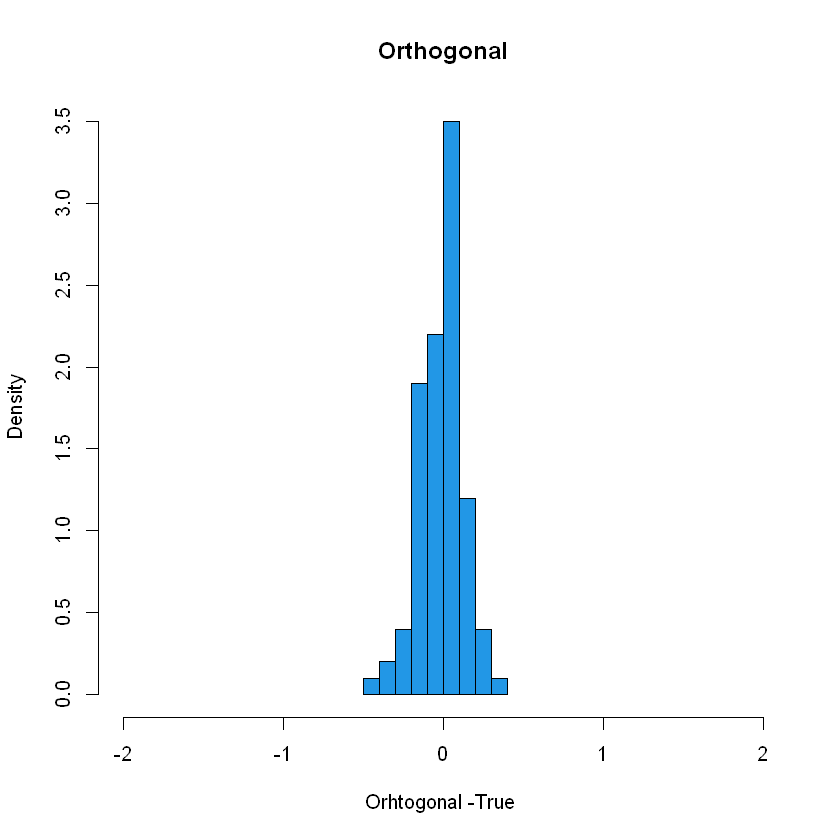

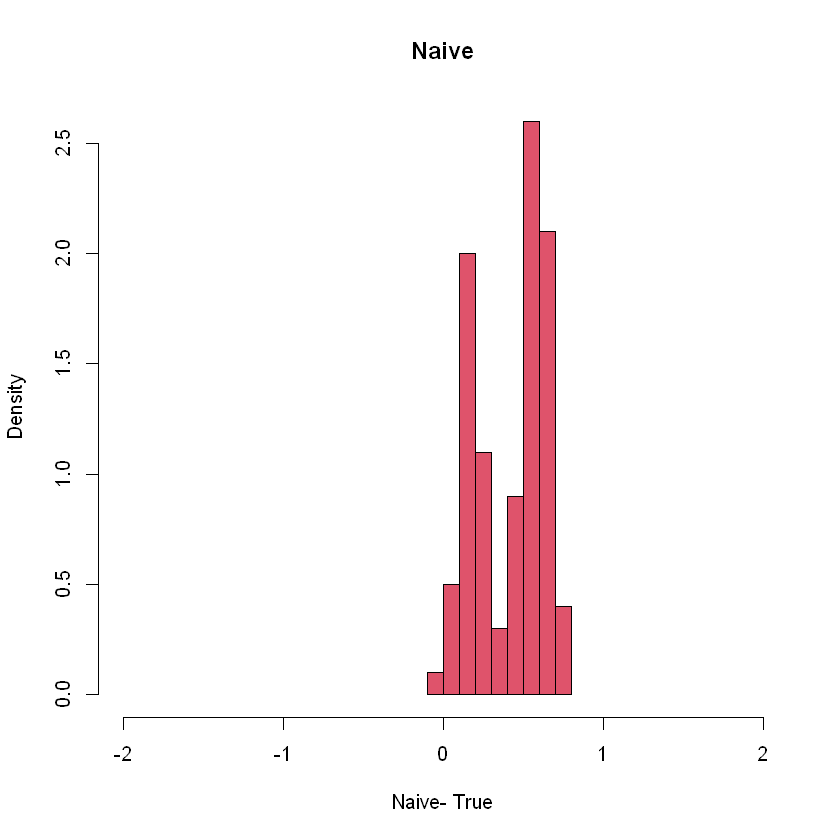

In [3]:
hist(Orthogonal-10,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-10, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")

In [4]:
library(hdm)

set.seed(1)
B= 1000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=1000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2
X=matrix(rnorm(n*p), n, p)
D=   X%*%gamma + rnorm(n)/4
Y = 10*D+ X%*%beta + rnorm(n)
# single selection method
SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso
if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}
if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}
#partialling out
resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


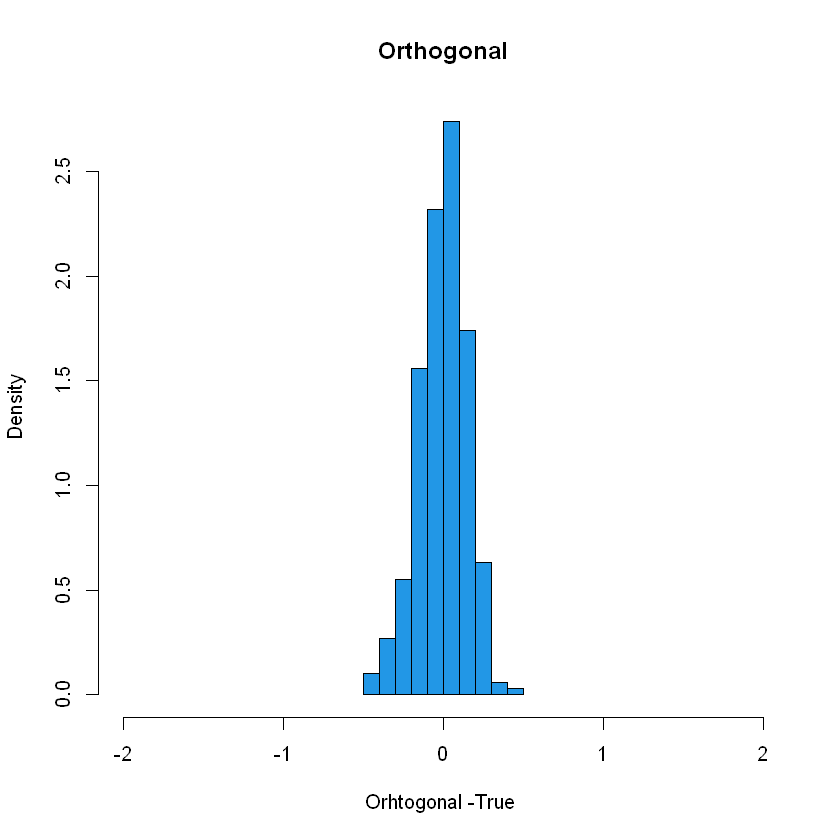

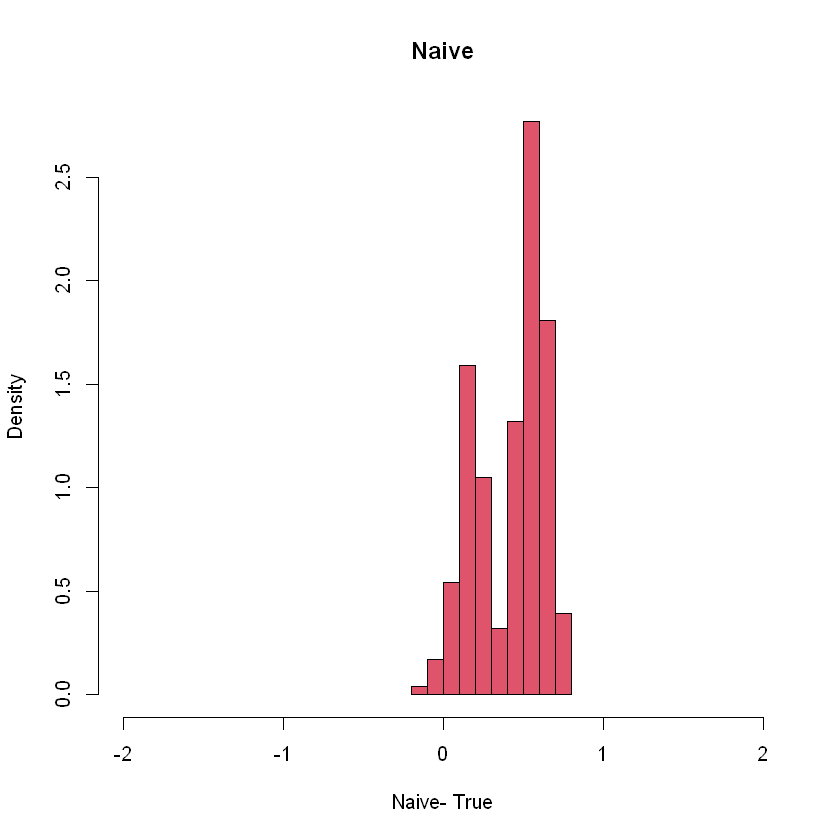

In [5]:
hist(Orthogonal-10,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-10, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


In [6]:
library(hdm)

set.seed(1)
B= 10000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=1000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2
X=matrix(rnorm(n*p), n, p)
D=   X%*%gamma + rnorm(n)/4
Y = 10*D+ X%*%beta + rnorm(n)
# single selection method
SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso
if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}
if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}
#partialling out
resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


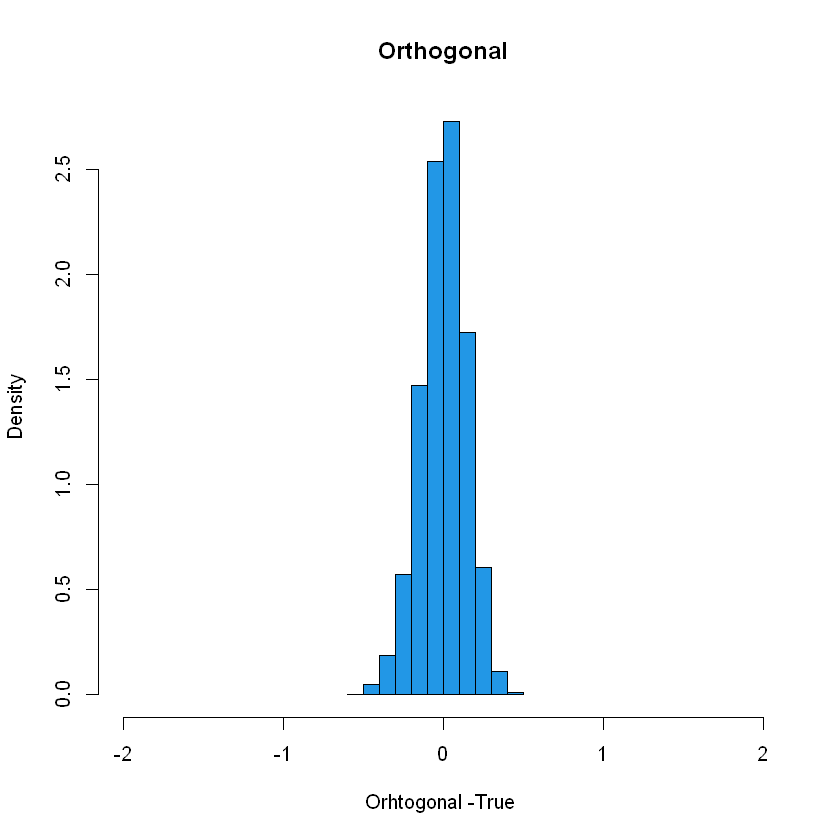

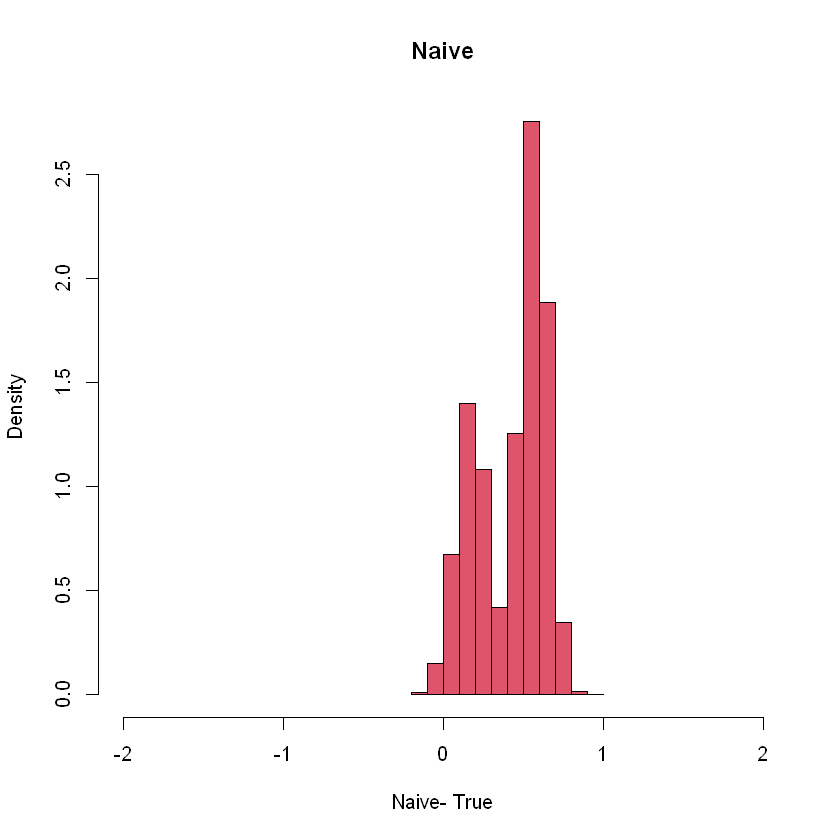

In [7]:
hist(Orthogonal-10,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-10, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


## Interpretation
The distribution of the histograms is different because they are grouped at various points. When B, what is the number of trials, is higher, the distribution is bigger. Also, the orthogonal should be centered in zero and the Naive should be centered in numbers higher than zero. The last one is biased to the right.

The econometric explanation is based on the approach to data modeling. For the orthogonal distribution, it is assumed that the features (variables) are orthogonal to each other, meaning that they are not correlated. When the errors are orthogonal to each other, it means that they are not correlated and that there is no systematic bias in the relationship between the dependent variable and the dependent variables. This is desirable because it implies that the regression model effectively captures the relationship between variables without additional bias. Zero-centering of the distribution can arise due to the way the model is specified, such as including an intercept or by standardizing variables. On the other hand, for the Naïve distribution, the bias to the right may arise from the nature of the data and the way the conditional probabilities of the variables are modeled. This could be related to the distribution of errors in a regression model. If errors have an asymmetric distribution, such as a right-weighted (positively biased) tail distribution, this can affect how relationships between variables are modeled.

## Parallel computing
Using parallel computing, the running time is lower. The multiprocessing module allows you to create multiple child processes, each of which can execute code independently. These processes can take advantage of the multiple CPU cores available on your machine, resulting in workload distribution and, in many cases, a significant reduction in execution time.. For example (B=100)

In [ ]:
library(parallel)

# Definir la función sleep
sleep <- function(sleep_sec = 0.5) {
  cat(paste("Sleeping for", sleep_sec, "seconds\n"))
  Sys.sleep(sleep_sec)
  cat("Finished sleeping\n")
}

num_cores <- detectCores() # Obtener el número de núcleos de CPU
print(num_cores) # Imprimir el número de núcleos de CPU

start_time <- Sys.time() # Iniciar el temporizador

cl <- makeCluster(num_cores) # Crear un clúster de núcleos

# Exportar la función sleep al clúster
clusterExport(cl, "sleep")

# Ejecutar la función sleep en paralelo
result <- parLapply(cl, 1:100, function(x) sleep(1.0))

# Detener el clúster
stopCluster(cl)

# Detener el temporizador y calcular el tiempo transcurrido
finish_time <- Sys.time()
tiempo <- finish_time - start_time

# Imprimir el tiempo transcurrido
print(paste("With Parallel computing, the running time is ", tiempo, "minutes"))

[1] 4
[1] "With Parallel computing, the running time is  26.485209941864 minutes"


# Double Lasso - Using School data



In [4]:
library(tidyverse)
library(glmnet)
library(hdm)

In [5]:
# Load the data
url <- "https://raw.githubusercontent.com/gsbDBI/ExperimentData/97a11199ba559f01c7b3803a1493ffa08631732e/School/bruhn2016.csv"
db <- read.csv(url)
# Drop rows with missing values in specific columns and replace dots in column names with underscores
names(db) <- gsub("\\.", "_", names(db))
db <- db %>% drop_na(outcome_test_score, school, failed_at_least_one_school_year, is_female, treatment)



In [6]:
# Display the first few rows of the dataset
head(db)

# Display the summary statistics of the dataset
summary(db)


,outcome_test_score,treatment,school,is_female,mother_attended_secondary_school,father_attened_secondary_school,failed_at_least_one_school_year,family_receives_cash_transfer,has_computer_with_internet_at_home,is_unemployed,has_some_form_of_income,saves_money_for_future_purchases,intention_to_save_index,makes_list_of_expenses_every_month,negotiates_prices_or_payment_methods,financial_autonomy_index
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,56.67166,1,35002914,1,1,1,0,0,0,1,0,0,48,0,1,56
2,29.07938,0,35908915,1,0,0,0,0,0,0,0,0,42,0,0,27
3,49.56353,1,33047324,1,0,0,0,0,1,0,1,0,50,0,1,31
4,43.09943,0,53012542,1,0,0,0,1,1,0,1,0,93,0,1,77
5,71.32960,0,53006984,1,1,0,0,0,1,1,1,0,52,0,1,43
6,80.06344,0,33049475,1,1,1,0,0,0,0,1,0,50,0,0,31


 outcome_test_score   treatment          school           is_female     
 Min.   : 23.55     Min.   :0.0000   Min.   :17000386   Min.   :0.0000  
 1st Qu.: 47.58     1st Qu.:0.0000   1st Qu.:31068276   1st Qu.:0.0000  
 Median : 59.22     Median :1.0000   Median :33090823   Median :1.0000  
 Mean   : 58.75     Mean   :0.5119   Mean   :32418591   Mean   :0.5576  
 3rd Qu.: 69.60     3rd Qu.:1.0000   3rd Qu.:35019860   3rd Qu.:1.0000  
 Max.   :100.00     Max.   :1.0000   Max.   :53068181   Max.   :1.0000  
                                                                        
 mother_attended_secondary_school father_attened_secondary_school
 Min.   :0.0000                   Min.   :0.0000                 
 1st Qu.:0.0000                   1st Qu.:0.0000                 
 Median :0.0000                   Median :0.0000                 
 Mean   :0.4307                   Mean   :0.3956                 
 3rd Qu.:1.0000                   3rd Qu.:1.0000                 
 Max.   :1.0000     

## OLS

In [7]:
# OLS Models in the paper
modelo1a <- lm(outcome_test_score ~ treatment, data = db)
modelo1b <- lm(outcome_test_score ~ treatment + school, data = db)
modelo1c <- lm(outcome_test_score ~ treatment + school + failed_at_least_one_school_year + is_female, data = db)

In [8]:
# Summarize the OLS models
summary(modelo1a)
summary(modelo1b)
summary(modelo1c)


Call:
lm(formula = outcome_test_score ~ treatment, data = db)

Residuals:
   Min     1Q Median     3Q    Max 
-36.75 -11.07   0.37  10.72  43.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  56.4976     0.1682  335.83   <2e-16 ***
treatment     4.3995     0.2351   18.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.57 on 15363 degrees of freedom
Multiple R-squared:  0.02228,	Adjusted R-squared:  0.02222 
F-statistic: 350.1 on 1 and 15363 DF,  p-value: < 2.2e-16



Call:
lm(formula = outcome_test_score ~ treatment + school, data = db)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.741 -11.077   0.367  10.717  43.544 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.635e+01  5.142e-01 109.585   <2e-16 ***
treatment   4.398e+00  2.352e-01  18.703   <2e-16 ***
school      4.472e-09  1.505e-08   0.297    0.766    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.57 on 15362 degrees of freedom
Multiple R-squared:  0.02228,	Adjusted R-squared:  0.02216 
F-statistic: 175.1 on 2 and 15362 DF,  p-value: < 2.2e-16



Call:
lm(formula = outcome_test_score ~ treatment + school + failed_at_least_one_school_year + 
    is_female, data = db)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.602 -10.430   0.156  10.191  43.057 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.698e+01  5.228e-01 108.981   <2e-16 ***
treatment                        4.480e+00  2.278e-01  19.664   <2e-16 ***
school                          -1.493e-09  1.457e-08  -0.102    0.918    
failed_at_least_one_school_year -7.146e+00  2.524e-01 -28.308   <2e-16 ***
is_female                        2.846e+00  2.302e-01  12.364   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.11 on 15360 degrees of freedom
Multiple R-squared:  0.08357,	Adjusted R-squared:  0.08334 
F-statistic: 350.2 on 4 and 15360 DF,  p-value: < 2.2e-16


## Double LASSO using cross Validation

In [9]:
# Prepare data for Double LASSO
X <- model.matrix(~ school + failed_at_least_one_school_year + is_female, data = db)[, -1]
Y <- db$outcome_test_score
D <- db$treatment

In [10]:
# Double LASSO using glmnet with cross-validation
cv_lasso_Y_W <- cv.glmnet(X, Y, alpha = 1)
cv_lasso_D_W <- cv.glmnet(X, D, alpha = 1)


In [11]:
# Calculate residuals
W_Y_residuals <- Y - predict(cv_lasso_Y_W, X, s = "lambda.min")
W_D_residuals <- D - predict(cv_lasso_D_W, X, s = "lambda.min")

In [12]:
# OLS of the residuals
ols_model_cv <- lm(W_Y_residuals ~ W_D_residuals)
summary(ols_model_cv)



Call:
lm(formula = W_Y_residuals ~ W_D_residuals)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.530 -10.427   0.153  10.194  43.008 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.300e-14  1.138e-01    0.00        1    
W_D_residuals  4.480e+00  2.278e-01   19.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.11 on 15363 degrees of freedom
Multiple R-squared:  0.02456,	Adjusted R-squared:  0.02449 
F-statistic: 386.7 on 1 and 15363 DF,  p-value: < 2.2e-16


## Double Lasso using theorical Lambda

In [33]:
#Set theorical lambda
theorical_lambda <- 0.68
lasso_Y_W <- rlasso(Y ~ ., data = as.data.frame(cbind(Y, X)), lambda = theorical_lambda)
W_Y_residuals <- residuals(lasso_Y_W)
lasso_D_W <- rlasso(D ~ ., data = as.data.frame(cbind(D, X)), lambda = theorical_lambda)
W_D_residuals <- residuals(lasso_D_W)

In [34]:
# OLS of the residuals
ols_model_lambda <- lm(W_Y_residuals ~ W_D_residuals)
summary(ols_model_lambda)


Call:
lm(formula = W_Y_residuals ~ W_D_residuals)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.619 -10.426   0.133  10.201  43.166 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.287e-16  1.138e-01    0.00        1    
W_D_residuals  4.475e+00  2.277e-01   19.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.11 on 15363 degrees of freedom
Multiple R-squared:  0.02453,	Adjusted R-squared:  0.02447 
F-statistic: 386.3 on 1 and 15363 DF,  p-value: < 2.2e-16


## Double Lasso using partialling out

In [25]:
double_lasso_po <- rlassoEffect(x = X, y = Y, d = D, method = "partialling out")
summary(double_lasso_po)

[1] "Estimates and significance testing of the effect of target variables"
     Estimate. Std. Error t value Pr(>|t|)    
[1,]    4.4747     0.2277   19.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [35]:
# Create DataFrame with results
table_1c <- data.frame(
  Method = "OLS",
  Coefficient = coef(modelo1c)[2],
  Std_Error = summary(modelo1c)$coefficients[2, 2],
  Conf_Interval_Lower = confint(modelo1c)[2, 1],
  Conf_Interval_Upper = confint(modelo1c)[2, 2]
)
table_2 <- data.frame(
  Method = "LASSO_CV",
  Coefficient = coef(ols_model_cv)[2],
  Std_Error = summary(ols_model_cv)$coefficients[2, 2],
  Conf_Interval_Lower = confint(ols_model_cv)[2, 1],
  Conf_Interval_Upper = confint(ols_model_cv)[2, 2]
)

table_3 <- data.frame(
  Method = "LASSO_lambda",
  Coefficient = coef(ols_model_lambda)[2],
  Std_Error = summary(ols_model_lambda)$coefficients[2, 2],
  Conf_Interval_Lower = confint(ols_model_lambda)[2, 1],
  Conf_Interval_Upper = confint(ols_model_lambda)[2, 2]
)

table_4 <- data.frame(
  Method = "LASSO_direct",
  Coefficient = double_lasso_po$alpha,
  Std_Error = double_lasso_po$se[1],
  Conf_Interval_Lower = double_lasso_po$alpha - 1.96 * double_lasso_po$se[1],
  Conf_Interval_Upper = double_lasso_po$alpha + 1.96 * double_lasso_po$se[1]
)

combined <- rbind(table_1c,table_2, table_3, table_4)
combined

,Method,Coefficient,Std_Error,Conf_Interval_Lower,Conf_Interval_Upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
treatment,OLS,4.480004,0.2278275,4.033435,4.926573
W_D_residuals,LASSO_CV,4.480011,0.2278078,4.033481,4.926541
W_D_residuals1,LASSO_lambda,4.474674,0.2276535,4.028446,4.920901
1,LASSO_direct,4.474674,0.2276535,4.028473,4.920874


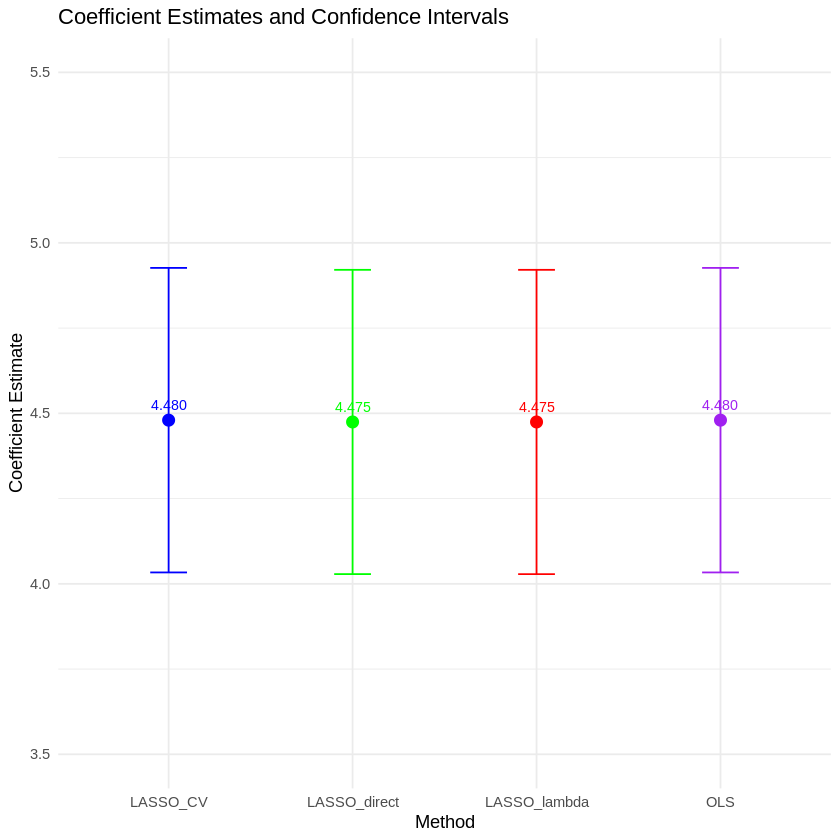

In [37]:
# Visualize the results
ggplot(combined, aes(x = Method, y = Coefficient, color = Method)) +
  geom_errorbar(aes(ymin = Conf_Interval_Lower, ymax = Conf_Interval_Upper), width = 0.2) +
  geom_point(size = 3) +
  geom_text(aes(label = sprintf("%.3f", Coefficient)), vjust = -1, size = 3) +
  theme_minimal() +
  labs(title = "Coefficient Estimates and Confidence Intervals",
       x = "Method",
       y = "Coefficient Estimate") +
  geom_hline(yintercept = 0, linetype = "dashed") +
  scale_color_manual(values = c("blue", "green", "red", "purple")) +
  theme(legend.position = "none") +
  coord_cartesian(ylim = c(3.5, 5.5))